<a href="https://colab.research.google.com/github/zarrinan/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade seaborn
import seaborn as sns

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=500)

display(example)

    100% |████████████████████████████████| 215kB 26.2MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

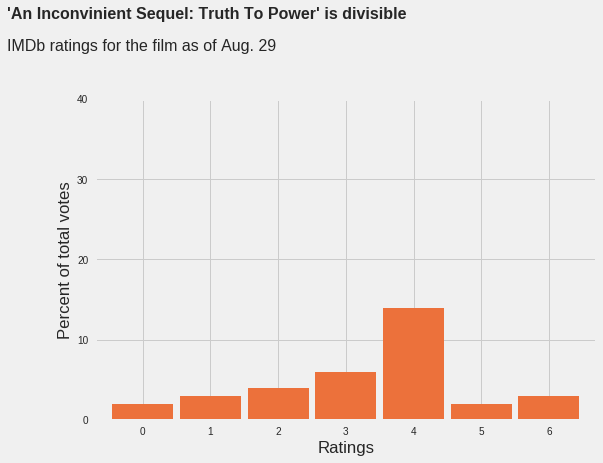

In [2]:
fake = pd.Series([2,3,4,6,14,2,3])
plt.style.use('fivethirtyeight')
ax = fake.plot.bar(color='#EC713B', width=0.9)
ax.set(xlabel='Ratings', ylabel='Percent of total votes',yticks=range(0,50, 10))
ax.text(x=-2, y=50, s ="'An Inconvinient Sequel: Truth To Power' is divisible", fontsize=16, fontweight='bold')
ax.text(x=-2, y=46, s ='IMDb ratings for the film as of Aug. 29', fontsize=16)
ax.tick_params(labelrotation=0)


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [4]:
df.sample(1).T

,29018
timestamp,2017-08-11 07:20:05.802791
respondents,2050
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5
mean,5.4
median,6
1_votes,886
2_votes,55
3_votes,30


In [5]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index(df.timestamp, inplace=True)

In [7]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [8]:
df['2017-08-29']

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,...,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,...,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,...,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,...,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,...,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,...,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,...,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,...,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [9]:
df.category.value_counts()

US users              4216
Aged 45+              4216
Females Aged 45+      4216
Females Aged 30-44    4216
IMDb staff            4216
Females               4216
Males under 18        4216
Non-US users          4216
Aged 18-29            4216
Females Aged 18-29    4216
Males Aged 45+        4216
Males Aged 18-29      4216
Aged 30-44            4216
Aged under 18         4216
Top 1000 voters       4216
Males                 4216
IMDb users            4216
Males Aged 30-44      4216
Females under 18      4165
Name: category, dtype: int64

In [10]:
df.link.value_counts()

http://www.imdb.com/title/tt6322922/ratings-female_age_4     4216
http://www.imdb.com/title/tt6322922/ratings-usa              4216
http://www.imdb.com/title/tt6322922/ratings-male_age_1       4216
http://www.imdb.com/title/tt6322922/ratings-age_4            4216
http://www.imdb.com/title/tt6322922/ratings-international    4216
http://www.imdb.com/title/tt6322922/ratings-male_age_3       4216
http://www.imdb.com/title/tt6322922/ratings-female           4216
http://www.imdb.com/title/tt6322922/ratings-age_2            4216
http://www.imdb.com/title/tt6322922/ratings-male             4216
http://www.imdb.com/title/tt6322922/ratings-female_age_3     4216
http://www.imdb.com/title/tt6322922/ratings-imdb_staff       4216
http://www.imdb.com/title/tt6322922/ratings-male_age_4       4216
http://www.imdb.com/title/tt6322922/ratings                  4216
http://www.imdb.com/title/tt6322922/ratings-age_3            4216
http://www.imdb.com/title/tt6322922/ratings-top_1000         4216
http://www

In [11]:
df[df.category=='IMDb users']

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,...,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,...,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


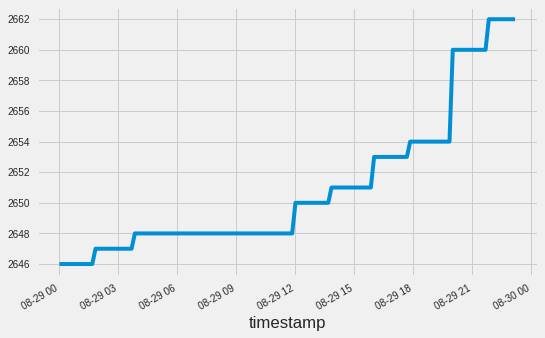

In [12]:
lastday = df['2017-08-29']
lastday[lastday.category=='IMDb users'].respondents.plot();

In [0]:
final = df.tail(1)
columns = ['1_pct', '2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct']
data = final[columns].T

In [14]:
data.T

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


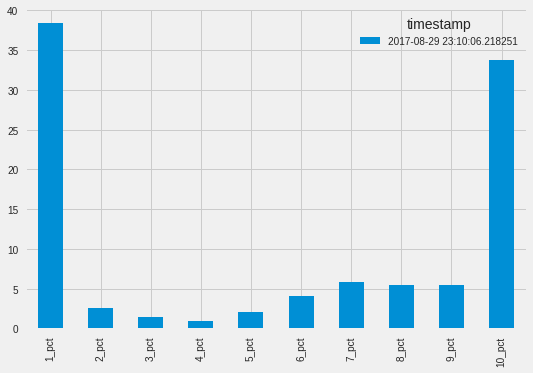

In [15]:
data.plot.bar()
#columns = ['{}_pct'.format(k) for k in range(1,11)]
#ax_real.get_legend().remove()


In [0]:
data.index = range(1,11)

In [17]:
data.head()

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1


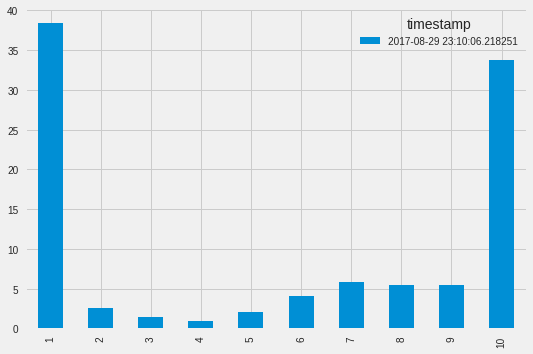

In [18]:
data.plot.bar()

In [0]:
colors = ['#333333'] *10
colors[0] = '#ec713b'

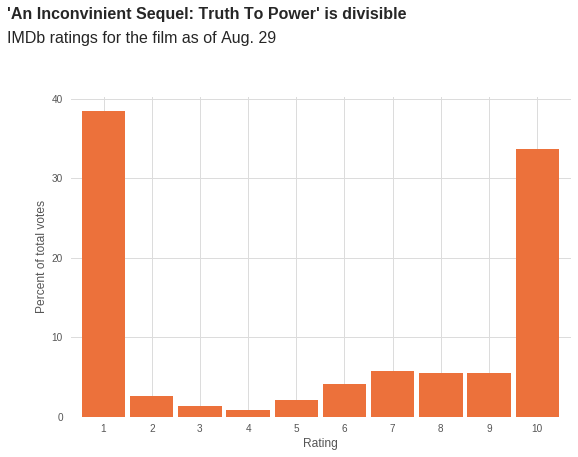

In [20]:
plt.style.use('ggplot')

ax_real = data.plot.bar(color=colors, width=0.9, legend=False);

ax_real.set(xlabel='Rating', 
            ylabel='Percent of total votes',
            yticks=range(0,50, 10))

#ax_real.get_legend().remove()
ax_real.text(x=-2, y=50, s ="'An Inconvinient Sequel: Truth To Power' is divisible", 
             fontsize=16, fontweight='bold')

ax_real.text(x=-2, y=47, s ='IMDb ratings for the film as of Aug. 29', fontsize=16, fontweight='normal')

ax_real.patch.set_facecolor('white')
plt.grid(color='#dcdcdc', linestyle='solid')


ax_real.tick_params(labelrotation=0)


In [21]:
display(example)

In [0]:
plt.style.available

In [23]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [24]:
df.category.value_counts()

US users              4216
Aged 45+              4216
Females Aged 45+      4216
Females Aged 30-44    4216
IMDb staff            4216
Females               4216
Males under 18        4216
Non-US users          4216
Aged 18-29            4216
Females Aged 18-29    4216
Males Aged 45+        4216
Males Aged 18-29      4216
Aged 30-44            4216
Aged under 18         4216
Top 1000 voters       4216
Males                 4216
IMDb users            4216
Males Aged 30-44      4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
df.set_index(df.timestamp, inplace=True)

In [26]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [27]:
df['2_9']=df['2_votes'] + df['3_votes']+df['4_votes']+df['5_votes']+df['6_votes']+df['7_votes']+df['8_votes']+df['9_votes']
df['2_9'].head()

timestamp
2017-07-17 12:28:32.785639    70
2017-07-17 12:28:33.025600    13
2017-07-17 12:28:33.273919     1
2017-07-17 12:28:33.495325     1
2017-07-17 12:28:33.722849    25
Name: 2_9, dtype: int64

In [28]:
df_females =  df[df.category=='Females']
df_males =  df[df.category=='Males']
df_males.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,2_9
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6,70
2017-07-17 12:34:17.770310,2017-07-17 12:34:17.770310,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6,70
2017-07-17 13:00:02.497484,2017-07-17 13:00:02.497484,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6,70
2017-07-17 14:00:02.990387,2017-07-17 14:00:02.990387,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,...,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,70
2017-07-17 15:00:02.218990,2017-07-17 15:00:02.218990,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,...,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,70


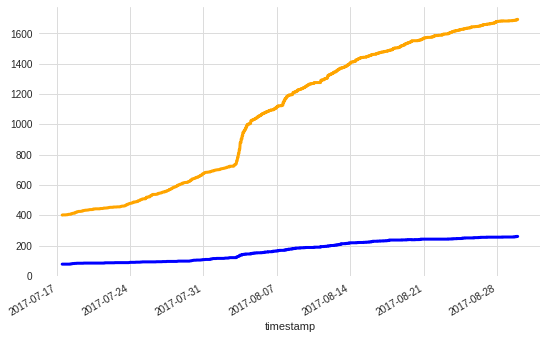

In [71]:
df_females.respondents.plot(color='blue', linewidth=3)
df_males.respondents.plot(color='orange', linewidth=3)

ax.set(xlabel='Rating Date', yticks=range(0,1600,500))
ax.tick_params(labelrotation=0)
ax_real.patch.set_facecolor('white')
plt.grid(color='#dcdcdc', linestyle='solid')



In [0]:
### This filtering method was causing errors, leaving it here ###
# df_females = df[df.category.str.contains("Female")]
# df_females.head()
# df_males = df[df.category.str.contains("Male")]
# df_males.head()

In [0]:
plt.style.available

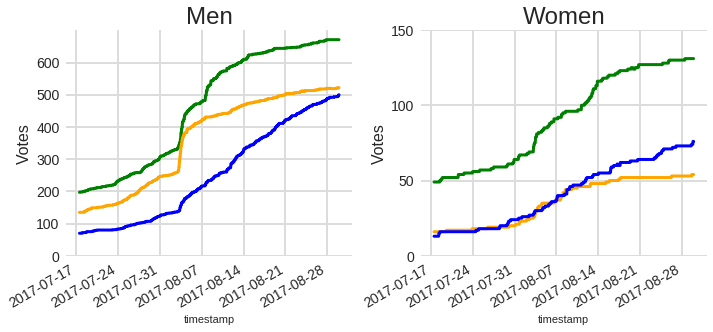

In [76]:
plt.style.use('seaborn')
f, ax = plt.subplots(figsize=(10,8))
plt.rcParams['axes.facecolor'] = 'white'


plt.subplot(2, 2, 1)
df_males['1_votes'].plot(color='green', linewidth=3)
df_males['2_9'].plot(color='blue', linewidth=3)
df_males['10_votes'].plot(color='orange', linewidth=3)
plt.grid(color='#dcdcdc', linestyle='solid')
plt.title('Men',fontsize=24)
plt.ylabel('Votes',fontsize=16)
plt.tick_params(axis='both',labelsize=14)
plt.yticks(range(0,700, 100))
plt.grid(color='#dcdcdc', linestyle='solid', linewidth=2)
plt.tight_layout()




plt.subplot(2, 2, 2)
df_females['1_votes'].plot(color='orange', linewidth=3)
df_females['2_9'].plot(color='blue', linewidth=3)
df_females['10_votes'].plot(color='green', linewidth=3)
plt.title('Women',fontsize=24)
plt.ylabel('Votes',fontsize=16)
plt.tick_params(axis='both',labelsize=14)
plt.yticks(range(0,160, 50))
plt.grid(color='#dcdcdc', linestyle='solid', linewidth=2)
plt.tight_layout()
